In [2]:
import matplotlib.pyplot as plt, numpy as np
from numpy import sin, cos, radians, pi

%reset_selective -f Flatarmynd

class Flatarmynd:

    ásar = None

    def __init__(self, staðsetning, litur):
        self.staðsetning = staðsetning
        self.litur = litur
        self._polygon = self.ásar.fill([], [], self.litur)[0]
        self._teikna()

    def breyta_stærð(self, margf):
        # Margfalda allar stærðir með margf
        pass
    
    @property
    def flatarmál(self):
        pass

    def stroka_út(self):
        self._polygon.set_xy(np.zeros((0,2)))

    def _teikna(self):
        P = self._útlínur()
        self._polygon.set_xy(P.T)
    
    def _útlínur(self):
        pass

    @classmethod
    def undirbúa(cls, figure):
        ásar = figure.add_axes([0,0,1,1])
        ásar.axis([0, 10, 0, 10])
        cls.ásar = ásar  # klasabreyta fær gildi

class Hringur(Flatarmynd):
    def __init__(self, staðsetning, litur, geisli):
        self.geisli = geisli
        super().__init__(staðsetning, litur)

    def breyta_stærð(self, margfaldari):
        self.geisli *= margfaldari
        self._teikna()

    @property
    def flatarmál(self):
        return self.geisli**2 * pi
        
    def _útlínur(self):
        a = np.linspace(0, 2*np.pi, 360)
        r = self.geisli
        (x,y) = self.staðsetning
        X = x + r*np.cos(a)
        Y = y + r*np.sin(a)
        return np.array([X,Y])
    
class Rétthyrningur(Flatarmynd):
    def __init__(self, staðsetning, litur, breidd, hæð):
        self.breidd = breidd
        self.hæð = hæð
        self.stefna = 0
        super().__init__(staðsetning, litur)

    @property
    def flatarmál(self):
        return self.breidd * self.hæð
        
    def breyta_stærð(self, margfaldari):
        self.breidd *= margfaldari
        self.hæð *= margfaldari
        self._teikna()

    def snúa(self, gráður):
        # Rangsælis
        self.stefna += gráður
        self._teikna()
        
    def _útlínur(self):
        xy = np.expand_dims(self.staðsetning, 1)
        (b, h) = (self.breidd, self.hæð)
        s = np.radians(self.stefna)
        snúningsfylki = np.array([[cos(s),-sin(s)], [sin(s),cos(s)]])
        M = np.array([[-b, b, b, -b, -b], [-h, -h, h, h, -h]])/2
        XY = snúningsfylki @ M
        return xy + XY

class Ferningur(Rétthyrningur):
    def __init__(self, staðsetning, litur, breidd):
        super().__init__(staðsetning, litur, breidd, breidd)

Flatarmál hrings = 12.566


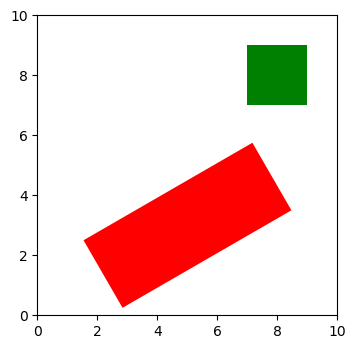

In [3]:
figure = plt.figure(figsize=(3,3))
Flatarmynd.undirbúa(figure) 
R = Rétthyrningur((5,3), 'red', breidd=5, hæð=2)
H = Hringur((3,7), 'blue', geisli=2)
F = Ferningur((8,8), 'green', breidd=2)
H.stroka_út()
R.breyta_stærð(1.3)
R.snúa(30)
print(f'Flatarmál hrings = {H.flatarmál:.3f}')

In [4]:
%matplotlib tk
f = plt.figure(figsize=(4,4))

In [7]:
Flatarmynd.undirbúa(f) 
R = Rétthyrningur((5,5), 'red', breidd=8, hæð=1)
plt.show()
for i in range(180):
    plt.pause(0.01)
    R.snúa(2)